In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from math import sqrt


bbv_file_path1 = "PATH1" #BBV compare file 1
bbv_file_path2 = "PATH2" #BBV compare file 2
bbv_file_path3 = "PATH3" #BBV compare file 3
bbv_file_path4 = "PATH4" #BBV compare file 4
bbv_file_path5 = "PATH5" #BBV compare file 5
bbv_file_path6 = "PATH6" #BBV compare file 6


In [2]:
#create function to calculate Manhattan distance 
def manhattan_distance(I, J):
    sum = 0
    for i in range(len(I)):
        sum += abs(I[i]-J[i])
    return int(sum)

In [3]:
def get_interval_list(bbv_file_path):
    regex = re.compile(r":([0-9]+):([0-9]+)")
    input_pairs = []
    all_intervals = []
    bbv_dict = {}
    count = 0
    with open(bbv_file_path) as file:
        line = file.readline()
        while line and line[0] == 'T':
            match = regex.findall(line)
            #match.sort(key = lambda int: int[0])
            input_pairs.append(match)
            for pair in match:
                if not(str(pair[0]) in bbv_dict):
                    bbv_dict[str(pair[0])] = count
                    count += 1
            line = file.readline()
    # input_pairs.sort(key=lambda x: x[0])     #WHY DOES THIS CAUSE CHANGES!!!!!!?????!!!!!
    for interval in input_pairs:
        new_list = new_list = [0.0 for i in range(len(bbv_dict))]
        for pair in interval:
            new_list[bbv_dict[(pair[0])]] = int(pair[1])
        all_intervals.append(new_list)
    return all_intervals, input_pairs

interval1, pairs1 = get_interval_list(bbv_file_path1)
interval2, pairs2 = get_interval_list(bbv_file_path2)
interval3, pairs3 = get_interval_list(bbv_file_path3)
interval4, pairs4 = get_interval_list(bbv_file_path4)
interval5, pairs5 = get_interval_list(bbv_file_path5)
interval6, pairs6 = get_interval_list(bbv_file_path6)

df1 = pd.DataFrame(interval1) #X86 Intervals
df2 = pd.DataFrame(interval2) #RISC-V Intervals
df3 = pd.DataFrame(interval3) #ARM Intervals
df4 = pd.DataFrame(interval4) #Cross Compiled RISC-V Intervals
df5 = pd.DataFrame(interval5) #Valgrind X86 Intervals
df6 = pd.DataFrame(interval6) #Valgrind ARM Intervals


FileNotFoundError: [Errno 2] No such file or directory: 'PATH1'

In [ ]:
# Calculate correlation between each pair of variable
rows1, cols1 = (len(interval1), len(interval1))
rows2, cols2 = (len(interval2), len(interval2))
rows3, cols3 = (len(interval3), len(interval3))
rows4, cols4 = (len(interval4), len(interval4))
rows5, cols5 = (len(interval5), len(interval5))
rows6, cols6 = (len(interval6), len(interval6))
# valgrind_matrix = [[0]*cols]*rows
# gem5_matrix = [[0]*cols]*rows
x86_matrix = list()
riscv_matrix= list()
arm_matrix= list()
ccriscv_matrix= list()
valgrind_X86_matrix= list()
valgrind_ARM_matrix= list()

for i in range(rows1):
     new_x86 = list()
     for j in range(cols1):
          new_x86.append(manhattan_distance(interval1[j], interval1[i]))
     x86_matrix.append(new_x86)

for i in range(rows2):
     new_riscv = list()
     for j in range(cols2):
          new_riscv.append(manhattan_distance(interval2[j], interval2[i]))
     riscv_matrix.append(new_riscv)

for i in range(rows3):
     new_arm = list()
     for j in range(cols3):
          new_arm.append(manhattan_distance(interval3[j], interval3[i]))
     arm_matrix.append(new_arm)

for i in range(rows4):
     new_ccriscv = list()
     for j in range(cols4):
          new_ccriscv.append(manhattan_distance(interval4[j], interval4[i]))
     ccriscv_matrix.append(new_ccriscv)

for i in range(rows5):
     new_val = list()
     for j in range(cols5):
          new_val.append(manhattan_distance(interval5[j], interval5[i]))
     valgrind_X86_matrix.append(new_val)

for i in range(rows6):
     new_ARM = list()
     for j in range(cols6):
          new_ARM.append(manhattan_distance(interval6[j], interval6[i]))
     valgrind_ARM_matrix.append(new_ARM)
#------------------------------------------------

# corr_matrix1=df_gem5.corr()
# corr_matrix2=df_valgrind.corr()

In [ ]:
# Plot only a half matrix
# Generate a mask for the upper triangle

# mask1 = np.zeros_like(valgrind_matrix)
# mask1[np.triu_indices_from(mask1)] = True
# mask2 = np.zeros_like(gem5_matrix)
# mask2[np.triu_indices_from(mask2)] = True

[Text(0.5, 1.0, 'Heatmap for ARM BBV Manhattan Distance'),
 Text(1914.529411764706, 0.5, 'BBV#'),
 Text(0.5, 69.0, 'BBV#')]

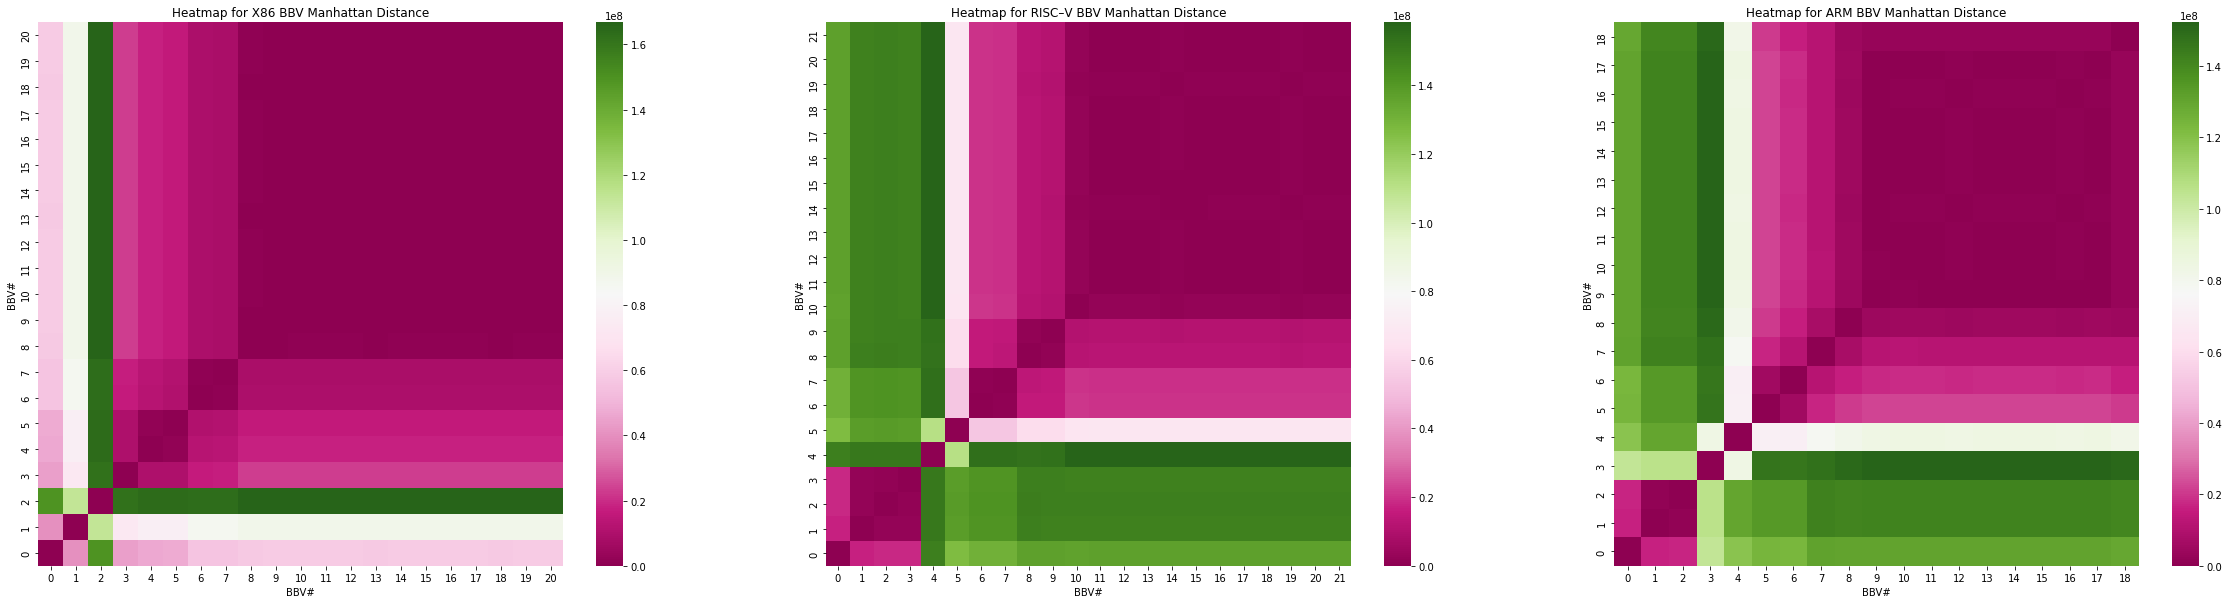

In [ ]:
# Plot heatmap for valgrind
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))
sns.heatmap(x86_matrix, ax=axes[0], cmap="PiYG")
axes[0].invert_yaxis()
axes[0].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")
sns.heatmap(riscv_matrix, ax=axes[1], cmap="PiYG")
axes[1].invert_yaxis()
axes[1].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")
sns.heatmap(arm_matrix, ax=axes[2], cmap="PiYG")
axes[2].invert_yaxis()
axes[2].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")

[Text(0.5, 1.0, 'Heatmap for X86 Valgrind BBV Manhattan Distance'),
 Text(1556.454545454545, 0.5, 'BBV#'),
 Text(0.5, 69.0, 'BBV#')]

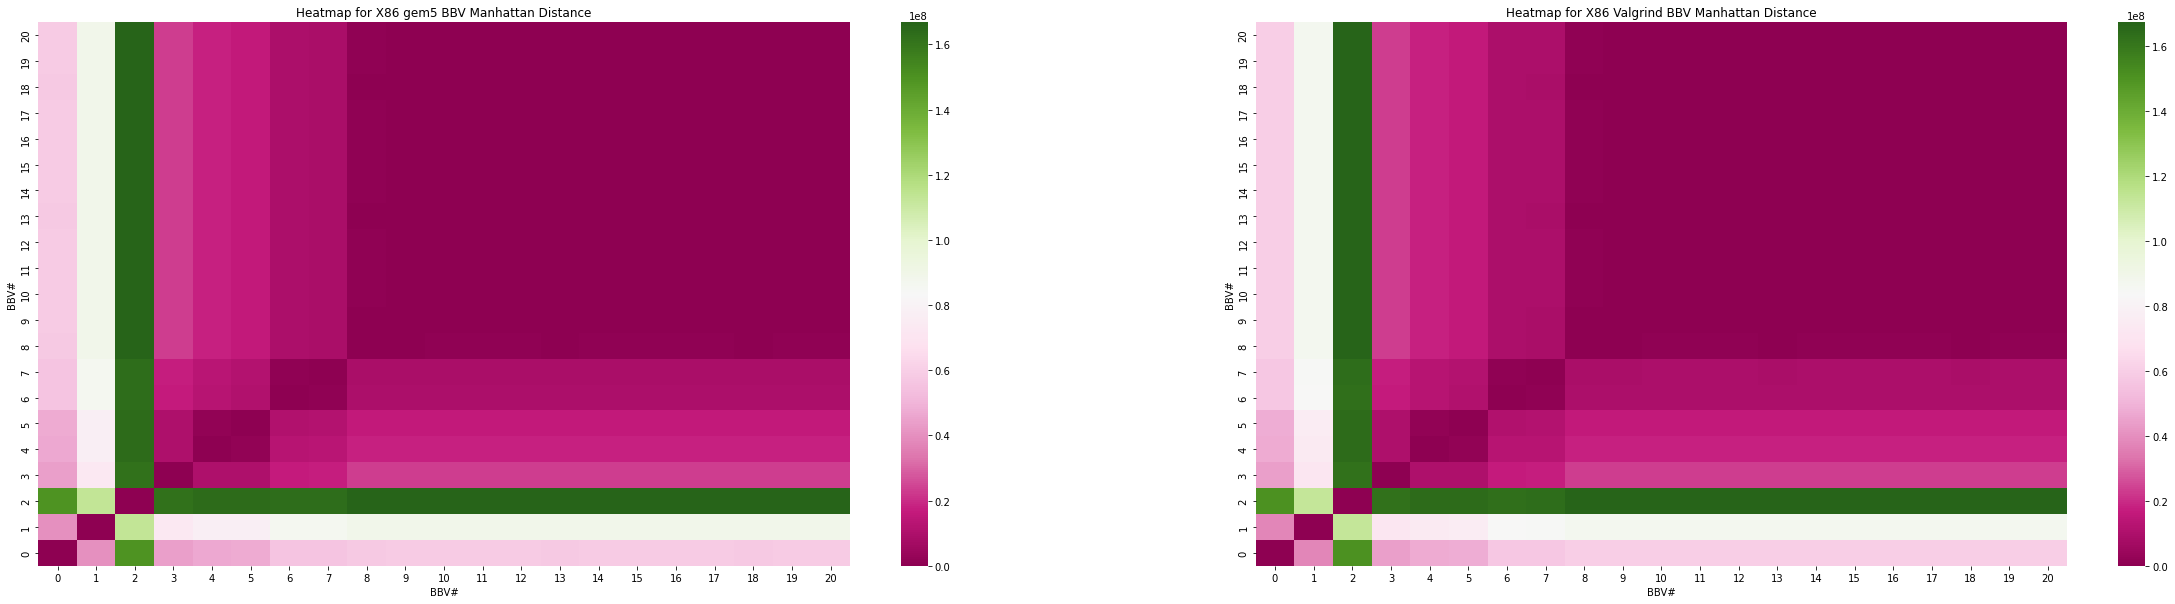

In [ ]:
# Plot heatmap for Valgrind vs gem5 BBV generators for X86 ISA
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
sns.heatmap(x86_matrix, ax=axes[0], cmap="PiYG")
axes[0].invert_yaxis()
axes[0].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")
sns.heatmap(valgrind_X86_matrix, ax=axes[1], cmap="PiYG")
axes[1].invert_yaxis()
axes[1].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")

[Text(0.5, 1.0, 'Heatmap for ARM Valgrind BBV Manhattan Distance'),
 Text(1556.454545454545, 0.5, 'BBV#'),
 Text(0.5, 69.0, 'BBV#')]

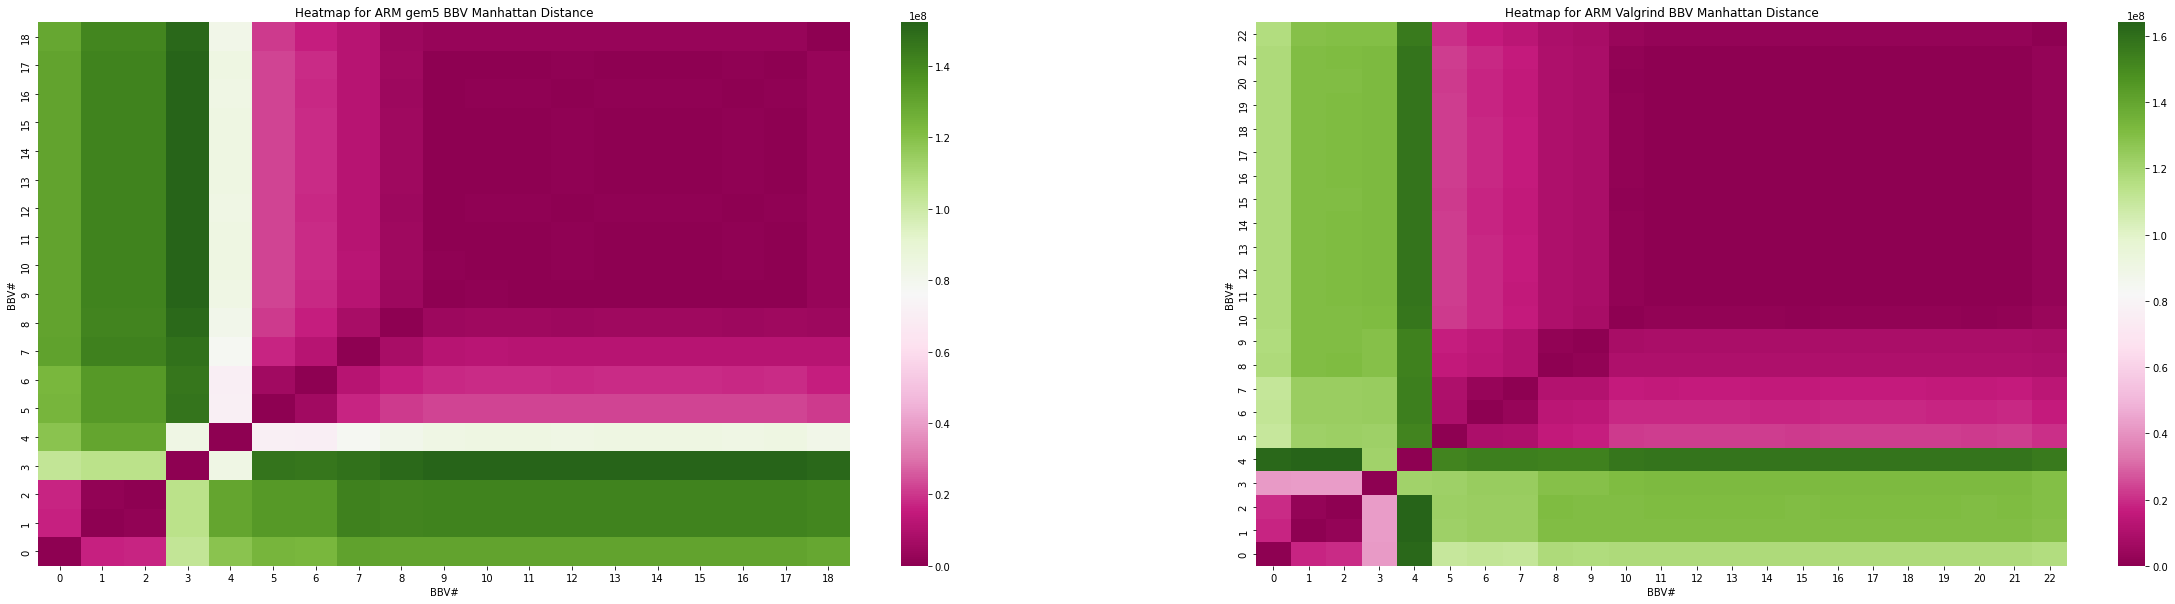

In [ ]:
# Plot heatmap for Valgrind vs gem5 BBV generators for ARM ISA
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
sns.heatmap(arm_matrix, ax=axes[0], cmap="PiYG")
axes[0].invert_yaxis()
axes[0].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")
sns.heatmap(valgrind_ARM_matrix, ax=axes[1], cmap="PiYG")
axes[1].invert_yaxis()
axes[1].set(title="TITLE", ylabel="BBV#", xlabel="BBV#")